<center>
    
# Advanced Pandas
    
</center>

 ## **Topics:**

* Data Aggregation
* Grouping
* Merging and joining Dataframes for data combination
* Time series data handling
* Data visualization with pandas

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data sets

In [2]:
customer_data = pd.read_csv("C:/Users/Solomon Itany/Desktop/Big data training/Advanced pandas/customer_data.csv")

In [3]:
sales = pd.read_csv("C:/Users/Solomon Itany/Desktop/Big data training/Advanced pandas/sales_data.csv")

In [4]:
flights = pd.read_csv("C:/Users/Solomon Itany/Desktop/Big data training/Advanced pandas/Flights.csv", low_memory=False)

In [5]:
tickets = pd.read_csv("C:/Users/Solomon Itany/Desktop/Big data training/Advanced pandas/Tickets.csv")

In [6]:
air_quality = pd.read_csv("C:/Users/Solomon Itany/Desktop/Big data training/Advanced pandas/air_quality_no2_long.csv")

**Flights/Tickets data**:https://github.com/CapitalOneRecruiting/DA-Airline-Data-Challenge

**Sales and Customer data**:https://www.kaggle.com/datasets/dataceo/sales-and-customer-data

**Air Quality data**:https://github.com/pandas-dev/pandas/blob/main/doc/data/air_quality_no2_long.csv

In [7]:
# Sample the data to reduce the size 
flights = flights.sample(n=80000)
tickets = tickets.sample(n=50000)
customers = customer_data.sample(n=80000)

In [8]:
customers.tail(5)

,customer_id,gender,age,payment_method
93029,C304556,Male,64.0,Cash
68211,C254517,Female,45.0,Cash
23581,C249019,Male,58.0,Cash
6871,C146245,Male,28.0,Debit Card
26643,C299052,Male,35.0,Cash


In [9]:
sales.head(3)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity


## 1. Data Aggregation

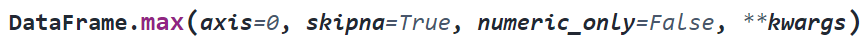

In [10]:
data = sales.merge(customers, how ='left', on = 'customer_id')

In [11]:
# aggregation on one column
data['price'].max()

5250.0

In [12]:
#mode for one column
data['price'].mode()

0    600.16
Name: price, dtype: float64

In [13]:
# Allnumerical data in the data frame
data.mode(axis=0, numeric_only=True)

,quantity,price,age
0,3,600.16,37.0


In [14]:
# mean for all the numerical data in the table
data.mean(axis=0, skipna=True, numeric_only=True)

quantity      3.003429
price       689.256321
age          43.467941
dtype: float64

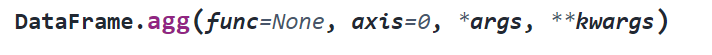

## Grouping

In [15]:
# Total sales per category
group1 = data.groupby('category')[['price']].sum().reset_index()
group1

,category,price
0,Books,226977.30
1,Clothing,31075684.64
2,Cosmetics,1848606.90
3,Food & Beverage,231568.71
4,Shoes,18135336.89
5,Souvenir,174436.83
6,Technology,15772050.00
7,Toys,1086704.64


In [16]:
# group by multipy categories/ Average sales per category/ shoping mall
group2 = data.groupby(['category', 'shopping_mall'])['price'].mean().reset_index()
group2.head(15)

,category,shopping_mall,price
0,Books,Cevahir AVM,46.506977
1,Books,Emaar Square Mall,46.862288
2,Books,Forum Istanbul,45.450000
3,Books,Istinye Park,44.859740
4,Books,Kanyon,44.403110
5,Books,Mall of Istanbul,45.804732
6,Books,Metrocity,45.752194
7,Books,Metropol AVM,46.723109
8,Books,Viaport Outlet,44.341463
9,Books,Zorlu Center,46.959195


In [17]:
# group by with multiple aggregate functions
group3 = data.groupby(['category', 'shopping_mall']).agg({'price': 'sum', 'quantity': 'sum', 'age': 'mean'}).reset_index()

# rename the columns
group3 = group3.rename(columns={'price': 'Total_sales', 'quantity': 'total_quantity', 'age': 'average_age'})
group3.head(15)

,category,shopping_mall,Total_sales,total_quantity,average_age
0,Books,Cevahir AVM,11998.80,792,44.805556
1,Books,Emaar Square Mall,11059.50,730,42.574359
2,Books,Forum Istanbul,11453.40,756,43.181373
3,Books,Istinye Park,20725.20,1368,43.872881
4,Books,Kanyon,44980.35,2969,43.631138
5,Books,Mall of Istanbul,46949.85,3099,44.071776
6,Books,Metrocity,34405.65,2271,43.205592
7,Books,Metropol AVM,22240.20,1468,43.822454
8,Books,Viaport Outlet,10908.00,720,42.910448
9,Books,Zorlu Center,12256.35,809,43.168367


## **1. Merging and joining Dataframes**

<center>
    
### Merge Method 
    
</center>

<div>
   <img src="attachment:image.png" width="300">
</div>

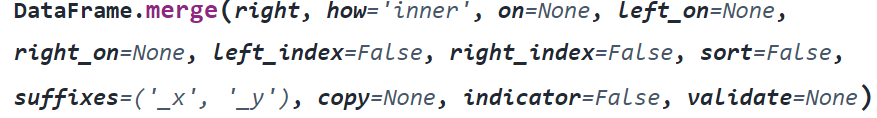

In [18]:
# Inner join 
Inner_join = sales.merge(customers, how='inner', on ='customer_id')

In [19]:
len(Inner_join)

80000

In [20]:
Inner_join.head(3)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,Male,20.0,Cash


In [21]:
left_join = sales.merge(customers, how ='left', on = 'customer_id')

In [22]:
len(left_join)

99457

In [23]:
left_join.head(3)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,Male,20.0,Cash


left_on and right_on Parameter

In [24]:
# Join on many fields
combined_df = flights.merge(tickets, left_on=['OP_CARRIER', 'ORIGIN', 'DESTINATION'],
                            right_on=['REPORTING_CARRIER', 'ORIGIN', 'DESTINATION'], how='left')

In [25]:
combined_df.head(3)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,ITIN_ID,YEAR,QUARTER,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE
0,2019-03-19,UA,N14240,659,13303,MIA,"Miami, FL",13930,ORD,"Chicago, IL",...,2.019140e+11,2019.0,1.0,US,FL,Florida,1.0,UA,1.0,447.0
1,2019-03-19,UA,N14240,659,13303,MIA,"Miami, FL",13930,ORD,"Chicago, IL",...,2.019140e+11,2019.0,1.0,US,FL,Florida,0.0,UA,1.0,355.0
2,2019-03-29,WN,N8623F,1778,14635,RSW,"Fort Myers, FL",15016,STL,"St. Louis, MO",...,2.019148e+11,2019.0,1.0,US,FL,Florida,1.0,WN,1.0,727.0


## Time series data handling in Pandas

In [26]:
# rename date
air_quality.rename(columns={"date.utc": "datetime"}, inplace=True)
air_quality.head(3)

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³


In [27]:
air_quality["datetime"].dtype

dtype('O')

In [28]:
# convert to date time
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [29]:
air_quality["datetime"].dtype

datetime64[ns, UTC]

In [30]:
# Feature engineer new columns
air_quality['Month'] = air_quality['datetime'].dt.month
air_quality['Day'] = air_quality['datetime'].dt.day
air_quality['Year'] = air_quality['datetime'].dt.year
air_quality['Hour'] = air_quality['datetime'].dt.hour
air_quality['Day_of_week'] = air_quality['datetime'].dt.dayofweek

In [31]:
air_quality.head(3)

,city,country,datetime,location,parameter,value,unit,Month,Day,Year,Hour,Day_of_week
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,21,2019,0,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,20,2019,23,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,20,2019,22,3


In [32]:
# look at the start and end date
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [33]:
# calculations using date
air_quality["datetime"].max()- air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [34]:
air_quality["Month"].max()- air_quality["Month"].min()

1

In [35]:
# Filtering
filtered_data = air_quality[(air_quality['Month'] == 5) & (air_quality['Day'] == 15)]
filtered_data.head(5)

,city,country,datetime,location,parameter,value,unit,Month,Day,Year,Hour,Day_of_week
792,Paris,FR,2019-05-15 23:00:00+00:00,FR04014,no2,30.9,µg/m³,5,15,2019,23,2
793,Paris,FR,2019-05-15 22:00:00+00:00,FR04014,no2,44.1,µg/m³,5,15,2019,22,2
794,Paris,FR,2019-05-15 21:00:00+00:00,FR04014,no2,36.0,µg/m³,5,15,2019,21,2
795,Paris,FR,2019-05-15 20:00:00+00:00,FR04014,no2,30.1,µg/m³,5,15,2019,20,2
796,Paris,FR,2019-05-15 19:00:00+00:00,FR04014,no2,20.3,µg/m³,5,15,2019,19,2


In [36]:
# Average air quality in different cities by Month
air_quality.groupby(['Month', 'city'])['value'].mean().reset_index()

,Month,city,value
0,5,Antwerpen,24.344156
1,5,London,28.158433
2,5,Paris,27.908446
3,6,Antwerpen,31.916667
4,6,London,19.581152
5,6,Paris,27.499272


In [37]:
# indexing time series data
data1 = air_quality.copy()

In [38]:
data1.set_index('datetime', inplace=True)

In [39]:
data1.head(3)

,city,country,location,parameter,value,unit,Month,Day,Year,Hour,Day_of_week
datetime,,,,,,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³,6,21,2019,0,4
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³,6,20,2019,23,3
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³,6,20,2019,22,3


In [40]:
data1.index.year

Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='datetime', length=2068)

In [41]:
data1.index.month

Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       ...
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype='int32', name='datetime', length=2068)

## Basic visualizations with Pandas

### Bar graph

In [42]:
bar_data = group1.sort_values(by='price', ascending=False)


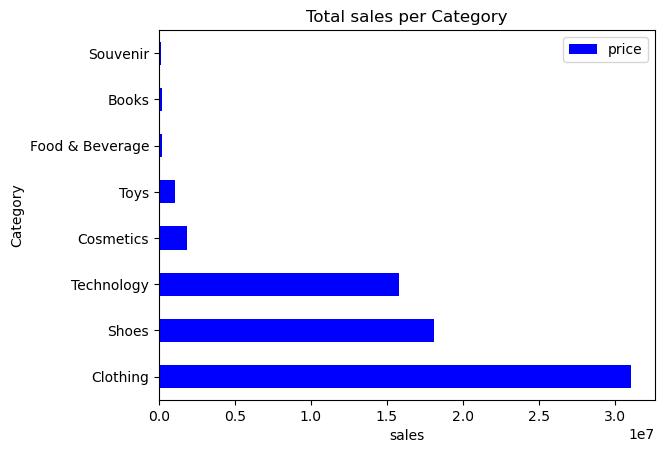

In [43]:
bar_data.plot.barh(x='category', y='price', color ='blue')
# Set labels and title
plt.xlabel('sales')  # Label for x-axis
plt.ylabel('Category')  # Label for y-axis
plt.title('Total sales per Category')  # Title for the plot
plt.show()

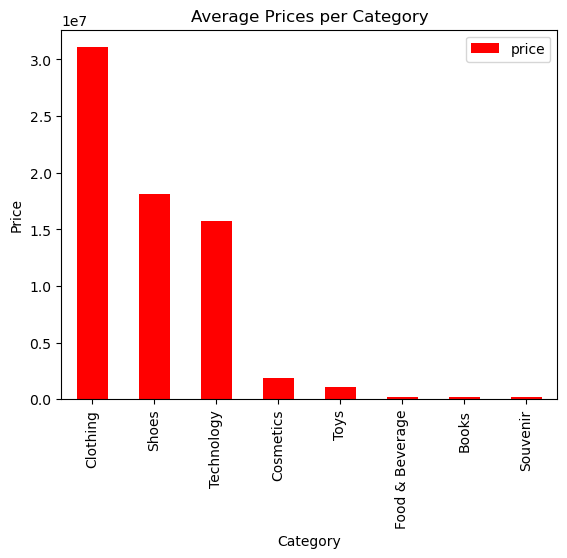

In [44]:
bar_data.plot.bar(x='category', y='price', color = 'red')
# Set labels and title
plt.xlabel('Category')  # Label for x-axis
plt.ylabel('Price')  # Label for y-axis
plt.title('Average Prices per Category')  # Title for the plot
plt.show()

### Box plot to check for outliers

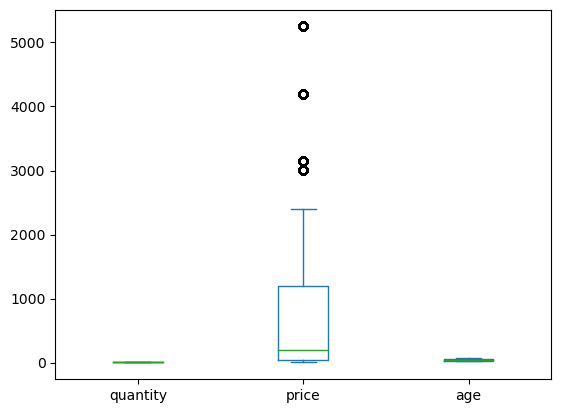

In [45]:
data.plot.box()
plt.show()

## Line Graph

In [46]:

import matplotlib.pyplot as plt

# Plot line graphs for each city
plt.figure(figsize=(10, 5))

# Loop through each city
for city in line_data['city'].unique():
    # Filter data for the current city
    city_data = line_data[line_data['city'] == city]
    # Plot the line graph for the current city
    plt.plot(city_data['Day_of_week'], city_data['value'], label=city)

# Set titles, labels, legend, and grid
plt.title('Average Air Quality per Day of the Week by City')
plt.xlabel('Day of the Week')
plt.ylabel('Average Air Quality')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend()
plt.show()


NameError: name 'line_data' is not defined

<Figure size 1000x500 with 0 Axes>